<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/Skripsi_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



#new
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import scipy.stats as stats



np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [59]:
dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")

df = dataset_df
dataset_df.head()

<ipython-input-59-1791d0b64d6a>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")


,profile_id,order_id,accom_id,room_id,accom_chain_name,selling_price_idr,gbv_idr,coupon_idr,sales_date_utc7,sales_timestamp,...,next_category_1,next_category_2,next_category_3,next_latest_sentiment_analysis,next_room_type,next_bed_type,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
0,ET0LCvUlRKbtFLscAFkCi/WWLLw=,HCcNAiyXSymMGRQkSqzAAtFlMxc=,Uz+MOvMFoXZMCkmixPFGgpTm9lU=,L6H56k4Rou+RiVAeX2QFwrv6xwY=,NaN,524927.868189,570579.672607,0,2018-09-22,2018-09-22 09:35:41.027 UTC,...,NaN,NaN,NaN,NaN,DELUXE,ONE_DOUBLE_BED,NaN,2,7,1
1,exoQ3kUraPU4wFlzPkk5+ykBwTs=,sRDgi4iW3och3ZkFvI/7aW1P3xY=,PMJIaKNhV02UjxNiev3Ltce2kNQ=,h10O5X/RJjDGNa+4oSVmxZBhplQ=,iCwYKECg554FmWkZKOS6O7I8nXA=,853068.342720,721837.932454,0,2018-09-22,2018-09-22 03:16:16.417 UTC,...,NaN,NaN,NaN,NaN,NaN,KING,25.0,2,4,1
2,9GuIvtbdJFVdHFM/0x1p345wCwM=,xlSmSKB3tahvfYZ1DEq0Zu3nek0=,Y4UBm0bDkNkWK2JWpzmbJTlQLqc=,lqSNqRT0DKCxUC60BE3jFG5BwNQ=,NaN,192613.180745,188957.123586,0,2018-09-22,2018-09-22 01:28:14.882 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,18.5,2,4,1
3,QXB7Zobjy0aW6Q8SYt8DQD7fSrQ=,3d4xj1dEU8Q1tSY2APAxmcjlwFw=,TxJe7ItZLbtw1K8Aqlem51jNvaE=,P+HWuys1viVCcm4/aqWuEJ91tb0=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,300377.277202,404480.886678,0,2018-09-22,2018-09-22 22:09:32.201 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED_OR_TWO_SINGLE_B,26.0,2,4,1
4,UVEV2qykZPJQ/kfd20M2/86qKrM=,Qnf6/o5tErU5iMEiwzkWhFfiIjc=,kneU7W4rjhdyr4nKoVOP17bfaVk=,wmCmvcyYOxvDtr5DADgjj48ClEs=,HIwm7tZAAnF5sNurgy85MraVTB0=,225738.474167,231019.601478,0,2018-09-22,2018-09-22 15:08:32.967 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,16.0,2,9,1


In [60]:
df["room_size_inmeter"].fillna(df["room_size_inmeter"].mean(),inplace = True)
df["next_room_size_inmeter"].fillna(df["next_room_size_inmeter"].mean(), inplace = True)
df["bed_type"].fillna(df["bed_type"].mode().iloc[0], inplace = True)
df["next_bed_type"].fillna(df["next_bed_type"].mode().iloc[0], inplace = True)
df["hotel_score"].fillna(df["hotel_score"].mean(),inplace = True)
df["next_hotel_score"].fillna(df["next_hotel_score"].mean(),inplace = True)

## Data Cleaning

In [61]:
missing_value = dataset_df.isnull().sum() *100 / len(dataset_df) 

df_missing_value = pd.DataFrame( {"missing_count" : dataset_df.isnull().sum(),
             "percent_missing" : missing_value })
print(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20))
print("length of columns are : ", len(dataset_df.columns))

                                missing_count  percent_missing
customer_type                           18970       100.000000
next_latest_sentiment_analysis          18970       100.000000
latest_sentiment_analysis               18969        99.994729
next_category_3                         18946        99.873484
next_category_0                         18899        99.625725
next_category_1                         18899        99.625725
next_category_2                         18899        99.625725
category_3                              18854        99.388508
category_2                              18712        98.639958
category_1                              18712        98.639958
category_0                              18711        98.634686
pid_score                               14678        77.374802
next_pid_score                          14467        76.262520
room_type                               13324        70.237217
next_room_type                          12949        68

In [62]:
#selecting not from the list 
df_clean = dataset_df.loc[:, ~dataset_df.columns.isin(df_missing_value.sort_values(by = "missing_count",ascending=False).head(17).index)]
df_clean = df_clean.dropna()


df_clean = df_clean.loc[:, ~df_clean.columns.isin(["count_buy_that_day",
                                                   "count_buy_that_month",
                                                   "count_buy_that_next_day",
                                                   "room_id",
                                                   "order_id",
                                                   "profile_id",
                                                   "interface",
                                                   "last_issued_date",
                                                   "next_bed_type",
                                                   "month",
                                                   "next_time_stamp",
                                                   "sales_timestamp",
                                                   "next_is_use_coupon",
                                                   "next_num_rooms",
                                                   "next_gbv_idr",
                                                   "accom_id" ,
                                                   "check_in_date",
                                                   "check_out_date",
                                                   "sales_date_utc7",
                                                   "next_check_in_date",
                                                   "next_check_out_date",
                                                   "next_sales_date",
                                                   "next_is_use_coupon",
                                                   "is_use_coupon",
                                                   "next_coupon_idr",
                                                   "coupon_idr"])]



In [63]:
df = df_clean 
missing_value = df_clean.isnull().sum() *100 / len(dataset_df) 
df_missing_value = pd.DataFrame( {"missing_count" : df_clean.isnull().sum(),
             "percent_missing" : missing_value} )
print("length columns : ",len(df_clean.columns)  )
print(df_missing_value.sort_values(by = "missing_count",ascending=False))

length columns :  16
                        missing_count  percent_missing
selling_price_idr                   0              0.0
gbv_idr                             0              0.0
accom_region                        0              0.0
accom_star_rating                   0              0.0
num_rooms                           0              0.0
accom_type                          0              0.0
bed_type                            0              0.0
room_size_inmeter                   0              0.0
hotel_score                         0              0.0
next_accom_id                       0              0.0
next_accom_region                   0              0.0
next_accom_star_rating              0              0.0
next_accom_type                     0              0.0
next_selling_price                  0              0.0
next_hotel_score                    0              0.0
next_room_size_inmeter              0              0.0


In [64]:
#adding index so to make it easier to merge 
df["Index"] = range(1,len(df)+1)

In [65]:
#defining independent and dependent
x =["selling_price_idr",
    "gbv_idr",
    "accom_region",
    "accom_star_rating",
    "num_rooms",
    "accom_type",
    "bed_type"
    "room_size_inmeter",
    "hotel_score"
    ]
y =["next_accom_id",
    "next_accom_region",
    "next_accom_star_rating",
    "next_accom_type",
    "next_selling_price",
    "next_hotel_score",
    "next_room_size_inmeter"
    ]

y_quantitative = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
y_qualitative  = ["next_accom_region","next_accom_type"]    



### Removing Outliers

In [66]:
#Removing Outliers 
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

# list of columns to remove outliers from
# remove outliers from selected columns
y_cleaned = remove_outliers(df[y], y_quantitative)
y = y_cleaned



###Group all accom

In [67]:
y_grouped = df.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()
y = y_grouped.iloc[:,1:]
y.head()

<ipython-input-67-ba309e306b44>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_grouped = df.groupby(by = ["next_accom_id","next_accom_region","next_accom_type"],as_index = False)["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"].mean()


,next_accom_region,next_accom_type,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter
0,Jawa Timur,HOMESTAY,1.0,896201.625996,8.434579,12.00000
1,Jawa Barat,HOTEL,2.0,513298.441428,8.420212,16.00000
2,Trang,HOTEL,2.0,294486.253722,8.831921,24.99785
3,Jawa Timur,HOTEL,2.0,437789.420298,8.572257,16.00000
4,Chonburi,GUESTHOUSE,2.0,212348.750150,8.017347,16.00000


### VIF Checking (only for Quantitative)

In [68]:
#coba pake korelasi
vif_df = pd.DataFrame()
vif_df["Feature"] = y[y_quantitative].columns
vif_df ["VIF"]= [variance_inflation_factor(y[y_quantitative].values, i) for i in range(len(y[y_quantitative].columns))]
vif_df

#coba check chi-square untuk kategorikal

,Feature,VIF
0,next_accom_star_rating,4.689812
1,next_selling_price,1.721430
2,next_hotel_score,4.291712
3,next_room_size_inmeter,1.249924


In [69]:
#correlation for quantitative columns 
print("Correlation : ")
print (pd.DataFrame (y[y_quantitative].corr()))

Correlation : 
                        next_accom_star_rating  next_selling_price  \
next_accom_star_rating                1.000000            0.356963   
next_selling_price                    0.356963            1.000000   
next_hotel_score                      0.285636            0.174012   
next_room_size_inmeter                0.069516            0.108117   

                        next_hotel_score  next_room_size_inmeter  
next_accom_star_rating          0.285636                0.069516  
next_selling_price              0.174012                0.108117  
next_hotel_score                1.000000                0.048545  
next_room_size_inmeter          0.048545                1.000000  


In [70]:
#chi square test for Categorical Variable
contingency_table = pd.crosstab(y["next_accom_region"],y["next_accom_type"])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

if p_value <= 0.05 : 
  print("Accepted")
else :
  print("Rejected")



Chi-square value: 4412.246706154173
P-value: 3.343329663332918e-250
Degrees of freedom: 1650
Accepted


### Min Max Scaling

In [71]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )

      # print(i, max)
      # print(i, min)
      print("")
  return scaled_columns

y_quantitative = build_min_max_scaler(y_grouped[y_quantitative])

y_final = y_quantitative 
y_final["next_accom_region"] = y_grouped["next_accom_region"]
y_final["next_accom_type"] = y_grouped["next_accom_type"]
y_final.head()

<ipython-input-71-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-71-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i]-min
<ipython-input-71-173645645695>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,next_accom_star_rating,next_selling_price,next_hotel_score,next_room_size_inmeter,next_accom_region,next_accom_type
0,0.2,0.04002,0.71538,0.00333,Jawa Timur,HOMESTAY
1,0.4,0.02207,0.71277,0.00444,Jawa Barat,HOTEL
2,0.4,0.01182,0.78762,0.00694,Trang,HOTEL
3,0.4,0.01853,0.74041,0.00444,Jawa Timur,HOTEL
4,0.4,0.00797,0.63952,0.00444,Chonburi,GUESTHOUSE


# K-Prototype Labeling

In [78]:
costs = []
n_clusters=[]
silhouette_scores = []
numerical_variable = ["next_accom_star_rating","next_selling_price","next_hotel_score","next_room_size_inmeter"]
for i in range (2,8):
  categorical_columns = [4,5]
  kp = KPrototypes(n_clusters=i, init='Cao', n_init=2, random_state = 42)
  clusters = kp.fit_predict(y_final, categorical=categorical_columns)
  costs.append(kp.cost_)
  silhouette_avg = silhouette_score(y_final[numerical_variable], clusters, metric='euclidean')
  silhouette_scores.append(silhouette_avg)
  n_clusters.append(i)

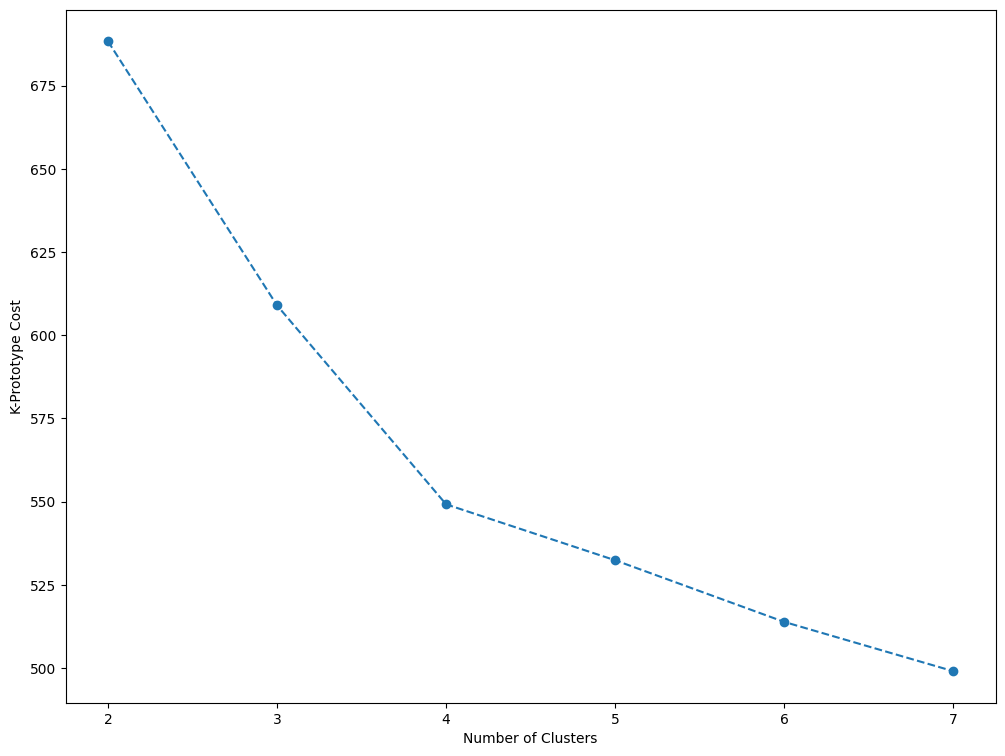

In [79]:
#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, costs, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype Cost')
plt.show()



2


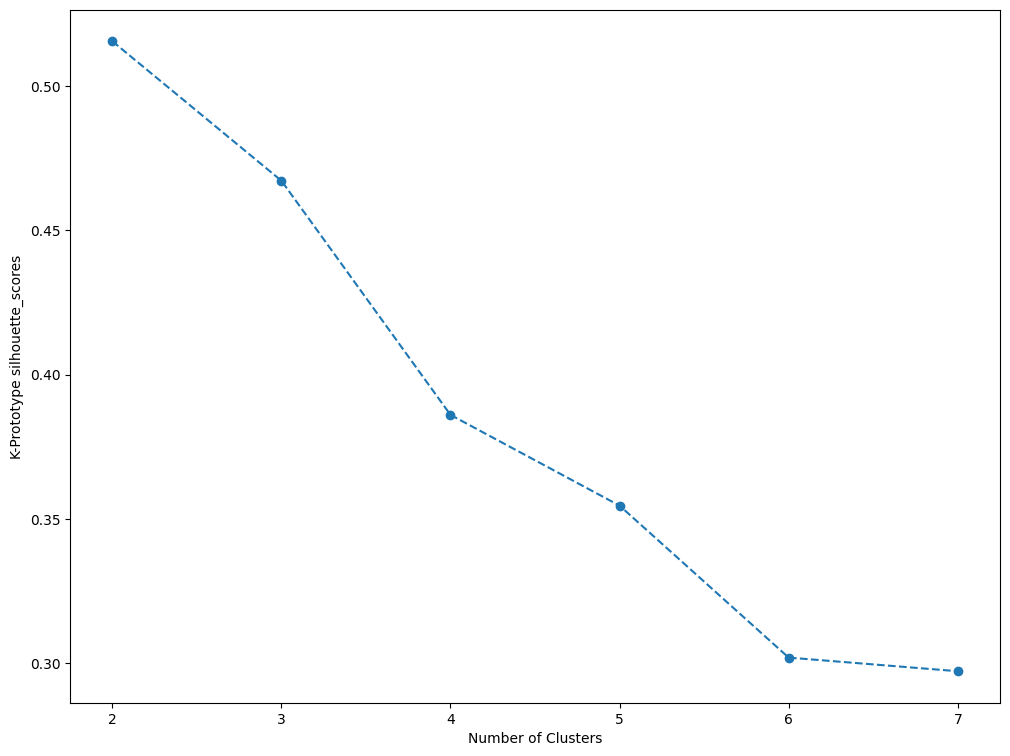

In [86]:
#plotting the optimal using sillhouette
optimal_n_clusters = n_clusters[np.argmax(silhouette_scores)]

print (optimal_n_clusters)




#Ploting Cost 
plt.figure(figsize=(12, 9))
plt.plot(n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Prototype silhouette_scores')
plt.show()



In [ ]:
categorical_columns = [4,5]
kp = KPrototypes(n_clusters=4, init='Cao', n_init=1, verbose=0, random_state= 42 )
clusters = kp.fit_predict(y_final, categorical=categorical_columns)
